In [2]:
import numpy as np
from sklearn import cluster, datasets, mixture
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

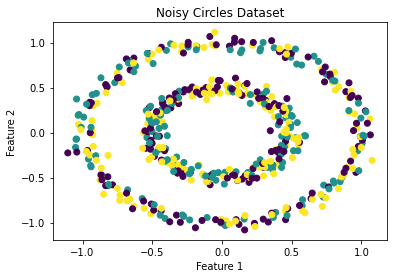

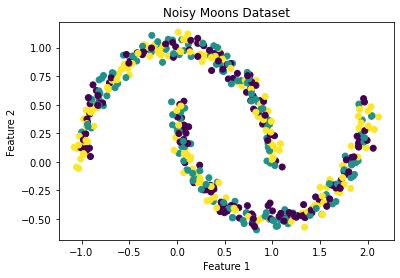

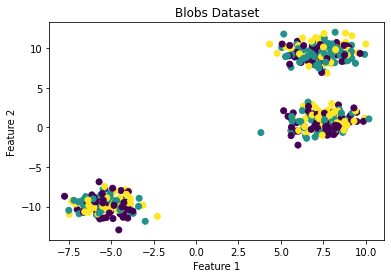

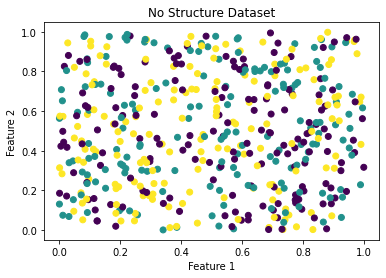

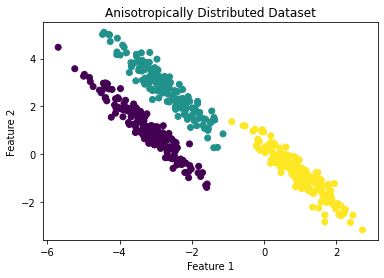

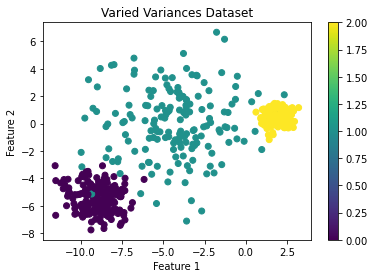

In [7]:
import matplotlib.pyplot as plt

# Graficar el dataset noisy_circles
plt.scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1], c=varied[1])
plt.title('Noisy Circles Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Graficar el dataset noisy_moons
plt.scatter(noisy_moons[0][:, 0], noisy_moons[0][:, 1], c=varied[1])
plt.title('Noisy Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Graficar el dataset blobs
plt.scatter(blobs[0][:, 0], blobs[0][:, 1], c=varied[1])
plt.title('Blobs Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Graficar el dataset no_structure
plt.scatter(no_structure[0][:, 0], no_structure[0][:, 1], c=varied[1])
plt.title('No Structure Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Graficar el dataset aniso
plt.scatter(aniso[0][:, 0], aniso[0][:, 1], c=varied[1])
plt.title('Anisotropically Distributed Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Graficar el dataset varied
plt.scatter(varied[0][:, 0], varied[0][:, 1], c=varied[1])
plt.title('Varied Variances Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

From the graphics, it can be concluded that there are many different ways in which data can be presented and grouped in various ways. It is very important to consider the origin of the data and the objectives that are being pursued with it in order to determine the best way to cluster, if necessary, or make the corresponding decision.

## Solution b

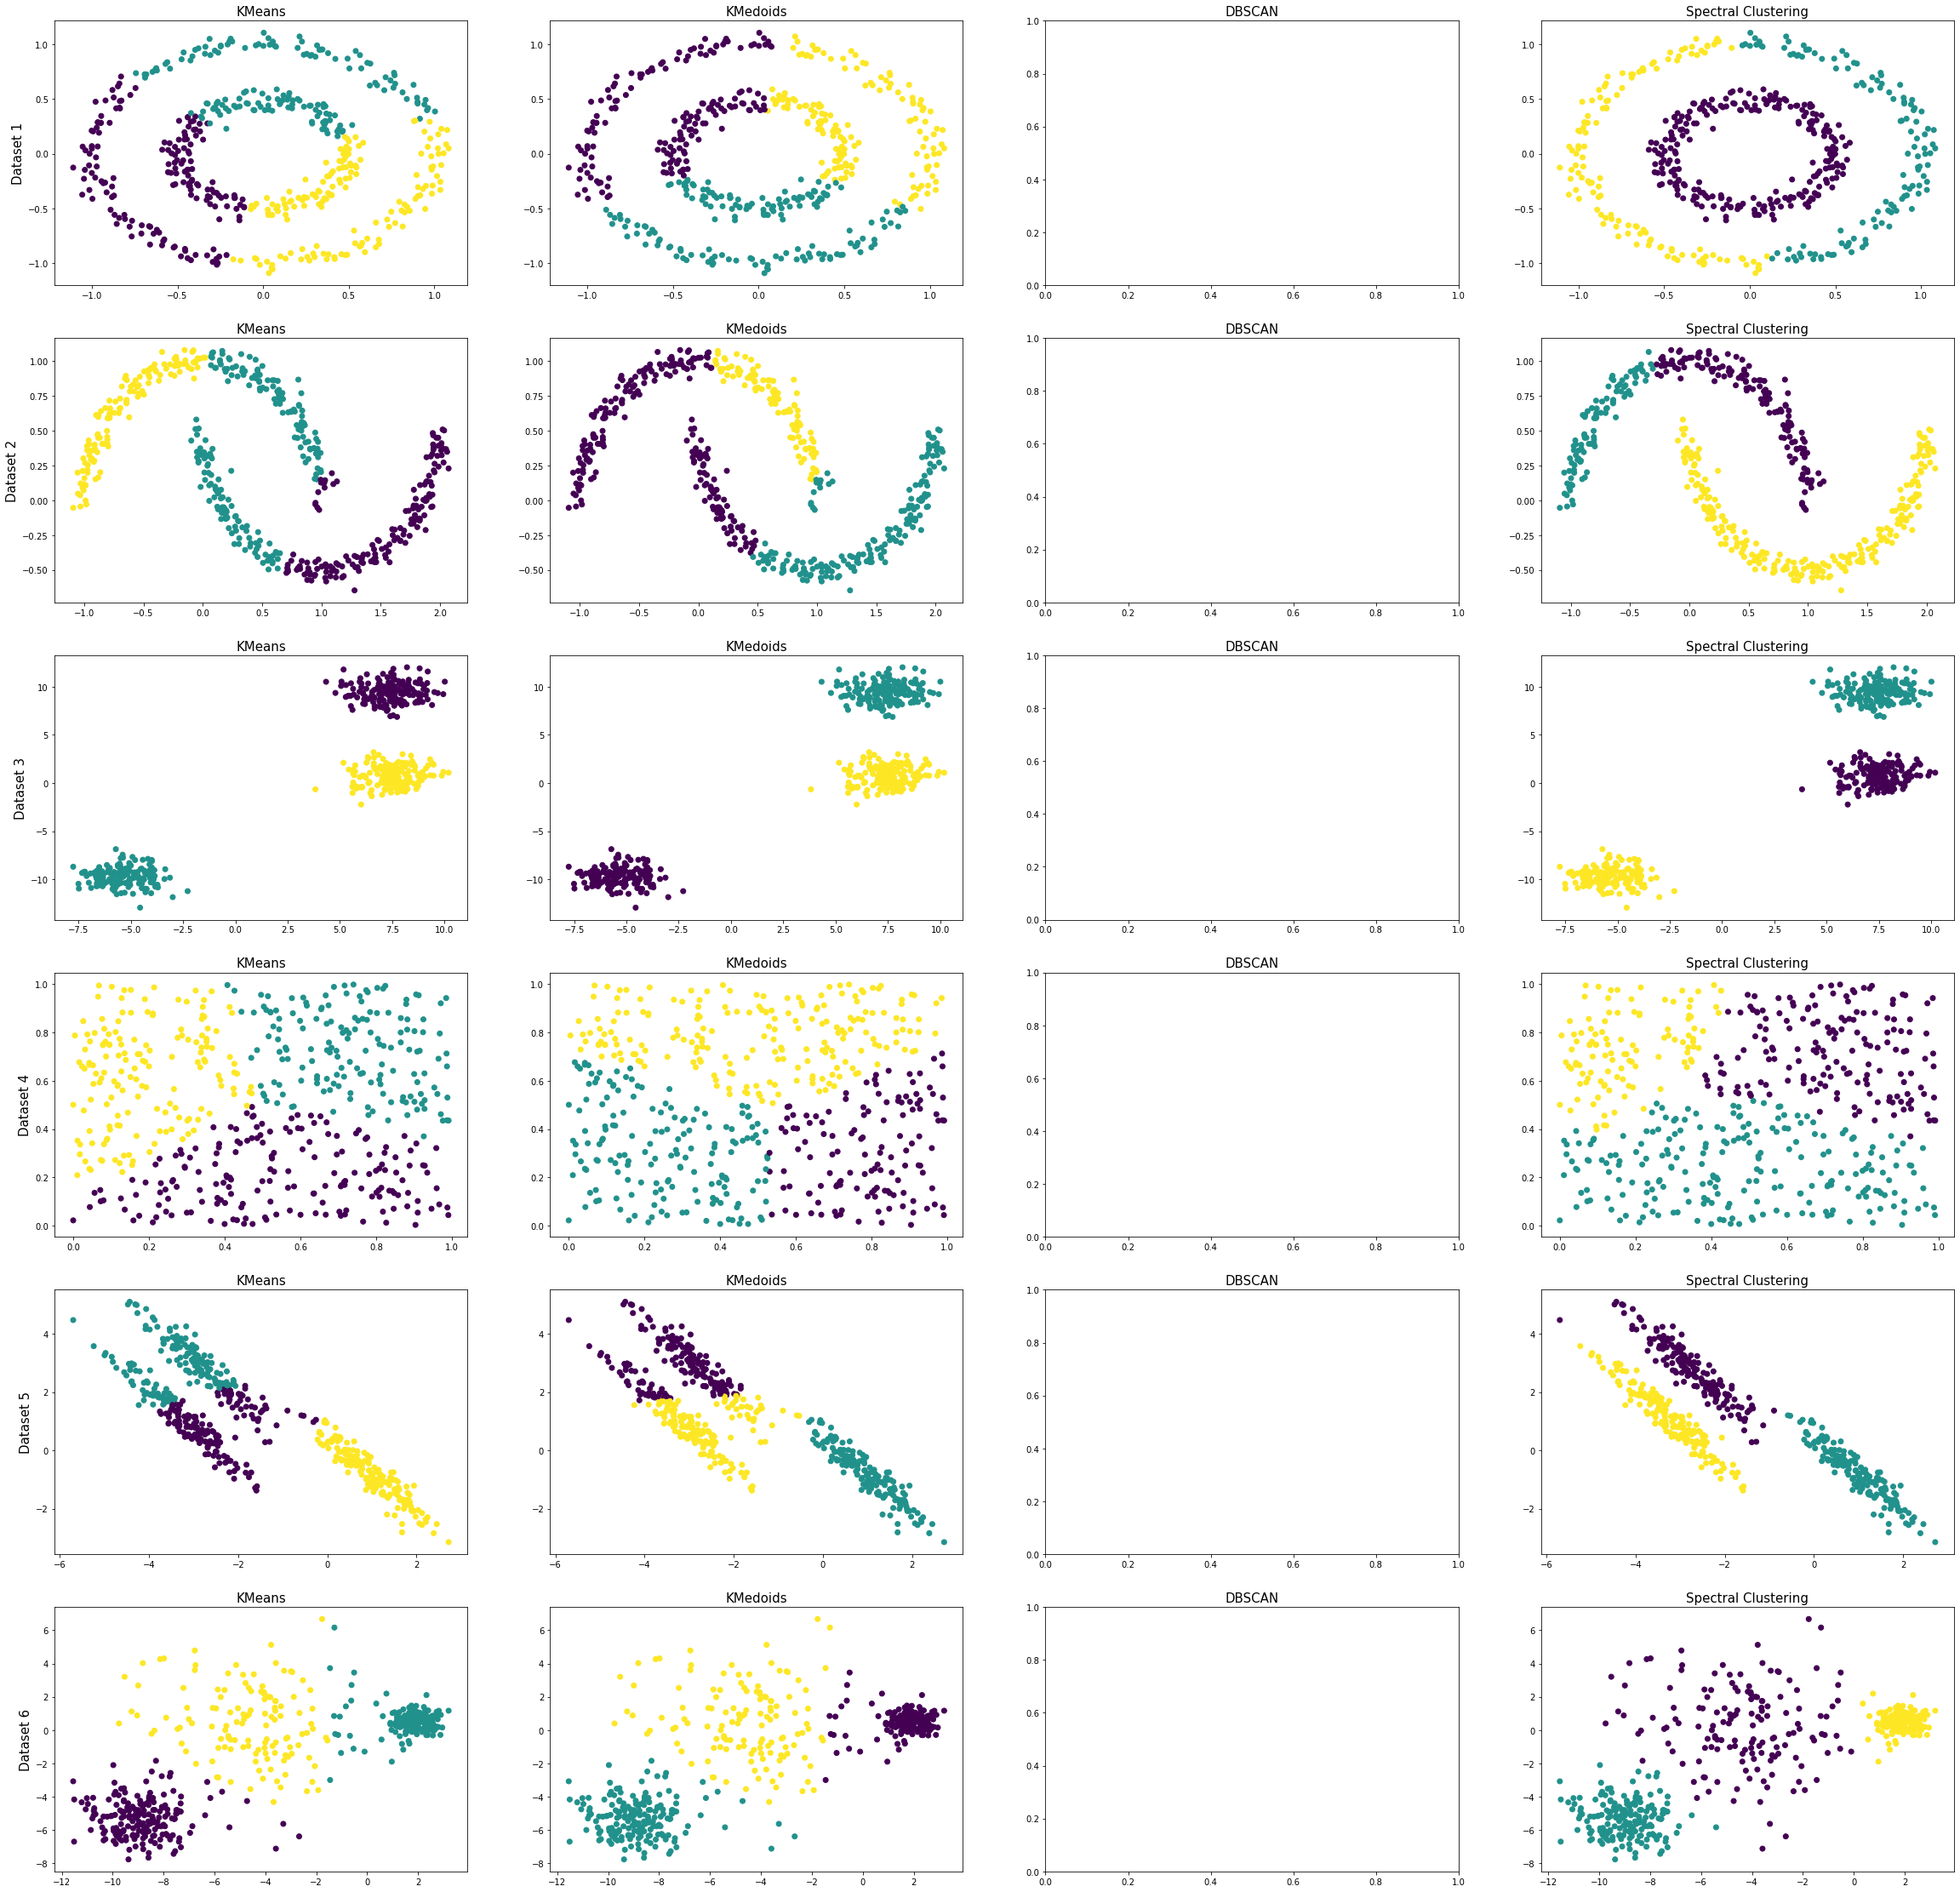

In [21]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_circles, make_moons, make_blobs

# Generate datasets
n_samples = 500
noisy_circles = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = make_moons(n_samples=n_samples, noise=0.05)
blobs = make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# Clusterings
kmeans = KMeans(n_clusters=3)
kmedoids = KMedoids(n_clusters=3)
dbscan = DBSCAN(eps=0.3, min_samples=10)
spectral = SpectralClustering(n_clusters=3, eigen_solver='arpack', affinity="nearest_neighbors")

clusterings = [kmeans, kmedoids, dbscan, spectral]
titles = ['KMeans', 'KMedoids', 'DBSCAN', 'Spectral Clustering']

datasets = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]

fig, axs = plt.subplots(nrows=len(datasets), ncols=len(clusterings), figsize=(40, 40))

for i, dataset in enumerate(datasets):
    X, y = dataset
    for j, clustering in enumerate(clusterings):
        axs[i][j].set_title(titles[j], fontsize=15)
        if j == 0:
            axs[i][j].set_ylabel(f'Dataset {i+1}', fontsize=15)
        if j == 2:
            clustering.fit(X)
        else:
            y_pred = clustering.fit_predict(X)
            axs[i][j].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
            
plt.show()


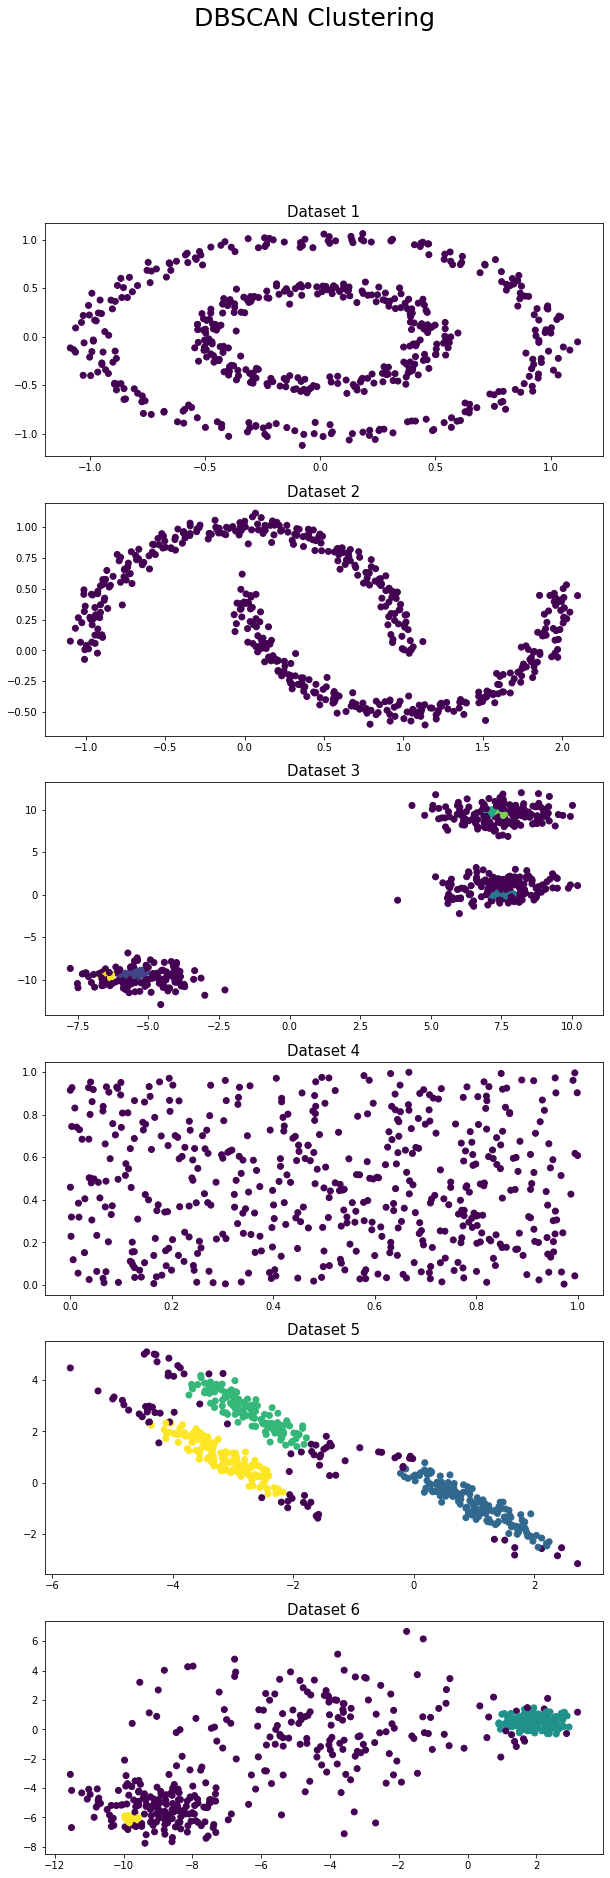

In [18]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles, make_moons, make_blobs

# Generate datasets
n_samples = 500
noisy_circles = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = make_moons(n_samples=n_samples, noise=0.05)
blobs = make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# Clustering with DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)

datasets = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]

fig, axs = plt.subplots(nrows=len(datasets), figsize=(10, 30))
fig.suptitle('DBSCAN Clustering', fontsize=25)


for i, dataset in enumerate(datasets):
    X, y = dataset
    y_pred = dbscan.fit_predict(X)
    axs[i].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
    axs[i].set_title(f'Dataset {i+1}', fontsize=15)

plt.show()
